In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM  # importing layers package , Dense layer is used to connect all layers
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [2]:
import pandas_datareader as data

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv("C:\\Users\\goelp\\Desktop\\SCIT Classroom material\\ASSIGNMENTS DONE BY ME\\Finance\\DLF EPS.csv")

In [8]:
df.shape

(2473, 4)

In [9]:
df = pd.DataFrame.dropna(df)

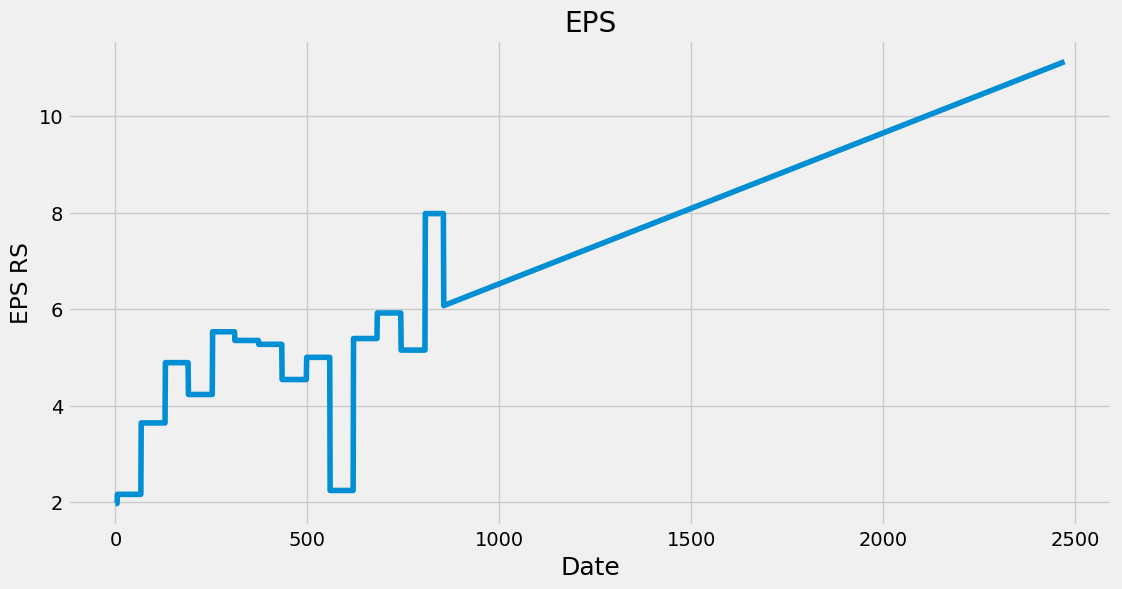

In [13]:
plt.figure(figsize=(12,6))
plt.title('EPS')
plt.plot(df['EPS'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('EPS RS')
plt.show()

In [14]:
data = df.filter(['EPS'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.80)  #Math. ceil() method rounds a number rounded UP to the nearest integer.
training_data_len

1979

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-2.26990137],
       [-2.26990137],
       [-2.26990137],
       ...,
       [ 1.65456497],
       [ 1.65590579],
       [ 1.6572466 ]])

In [16]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(120, len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i <= 70:
        print(x_train)
        print(y_train)
        print()

In [17]:
x_train,y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1859, 70)

In [18]:
x_train.shape[0],x_train.shape[1]

(1859, 70)

In [19]:
sample=float(x_train.shape[0])

In [20]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1859, 70, 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [43]:
model.fit(x_train,y_train, batch_size=32, epochs = 70)

Epoch 1/70
59/59 [==============================] - 2s 35ms/step - loss: 0.0037
Epoch 2/70
59/59 [==============================] - 2s 36ms/step - loss: 0.0041
Epoch 3/70
59/59 [==============================] - 2s 35ms/step - loss: 0.0042
Epoch 4/70
59/59 [==============================] - 2s 36ms/step - loss: 0.0039
Epoch 5/70
59/59 [==============================] - 2s 42ms/step - loss: 0.0040
Epoch 6/70
59/59 [==============================] - 2s 38ms/step - loss: 0.0040
Epoch 7/70
59/59 [==============================] - 2s 37ms/step - loss: 0.0041
Epoch 8/70
59/59 [==============================] - 2s 35ms/step - loss: 0.0038
Epoch 9/70
59/59 [==============================] - 2s 39ms/step - loss: 0.0043
Epoch 10/70
59/59 [==============================] - 3s 49ms/step - loss: 0.0038
Epoch 11/70
59/59 [==============================] - 3s 49ms/step - loss: 0.0043
Epoch 12/70
59/59 [==============================] - 3s 49ms/step - loss: 0.0043
Epoch 13/70
59/59 [==================

In [44]:
test_data = scaled_data[training_data_len - 70: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i, 0])

In [45]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [46]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 0s 12ms/step


C:\Users\goelp\AppData\Local\Temp\ipykernel_26460\3641130845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


KeyError: 'EPS'

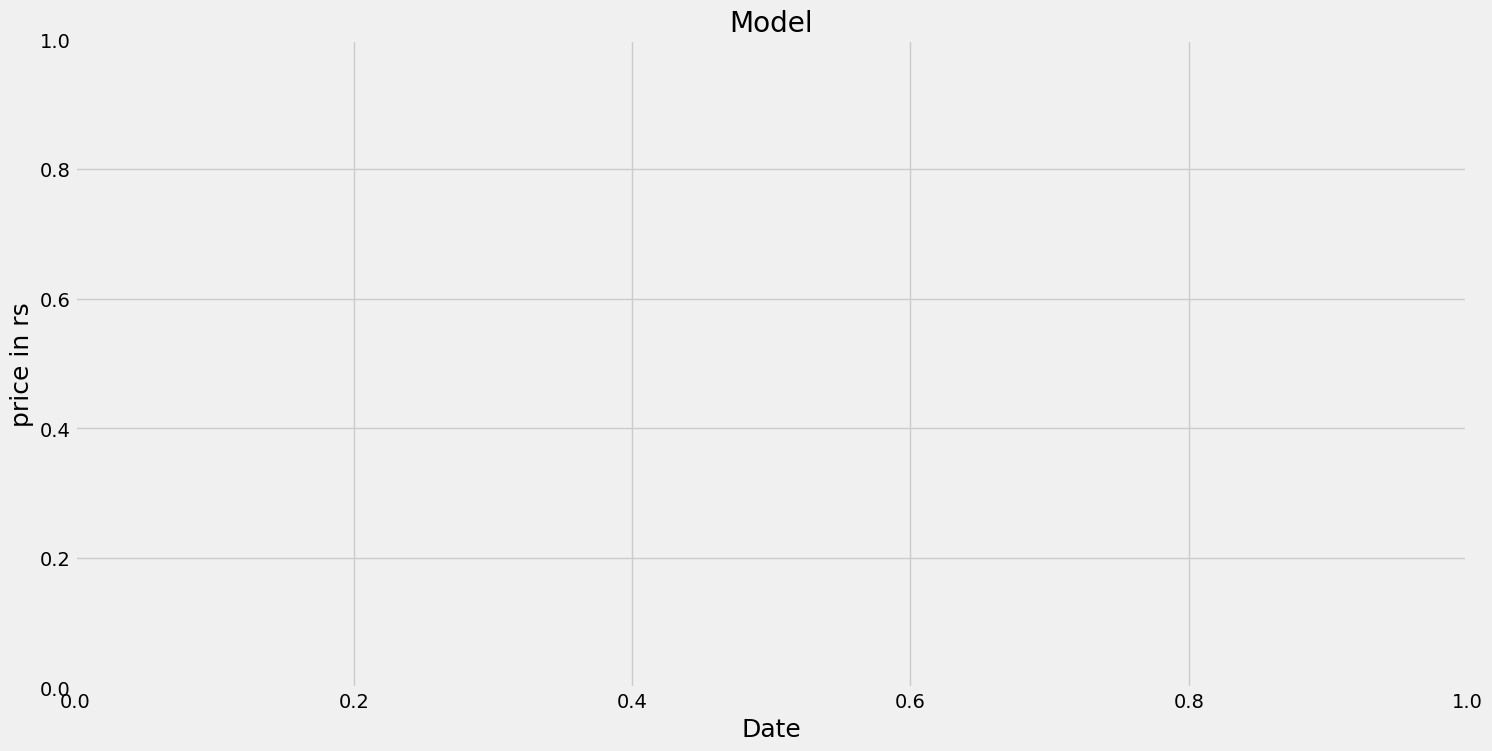

In [47]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('price in rs',fontsize=18)
plt.plot(train['EPS'])
plt.plot(valid[['EPS','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
EPS = valid.iloc[-1,:-1].values
EPS = EPS.tolist()
EPS_p = EPS[0]
predict = valid.iloc[-1,1:].values
predict = predict.tolist()
predict_p = predict[0]

In [ ]:
Error = (abs(predict_p - EPS_p)/(EPS_p))*100
print('The error rate between actual close and predicted close is ', Error)

In [ ]:
pwd

In [ ]:
valid

In [ ]:
valid.to_csv("C:\\Users\\goelp\\Desktop\\SCIT Classroom material\\ASSIGNMENTS DONE BY ME\\Finance\\DLF EPS preds.csv",encoding='utf-8')